In [1]:
%cd ..

/home/jairo/Documentos/GitHub/parallel-kink-scattering


/home/jairo/Documentos/GitHub/parallel-kink-scattering/.env/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from modules.numeric import *

In [3]:
from math import acosh, asinh, sqrt

X0 = 10
L = 100
N = 1024
DX = L/(N-1)
DT = 4e-2
phi4 = Phi4()

def y0(x, v, H):
    a = 1/sqrt(abs(H))
    return np.stack((
        (np.tanh(x - acosh(a)) if H > 0 else 1/np.tanh(x - asinh(a))) - phi4.kink(x + X0, 0, v) + 1,
        -phi4.kink_dt(x + X0, 0, v)
    ))

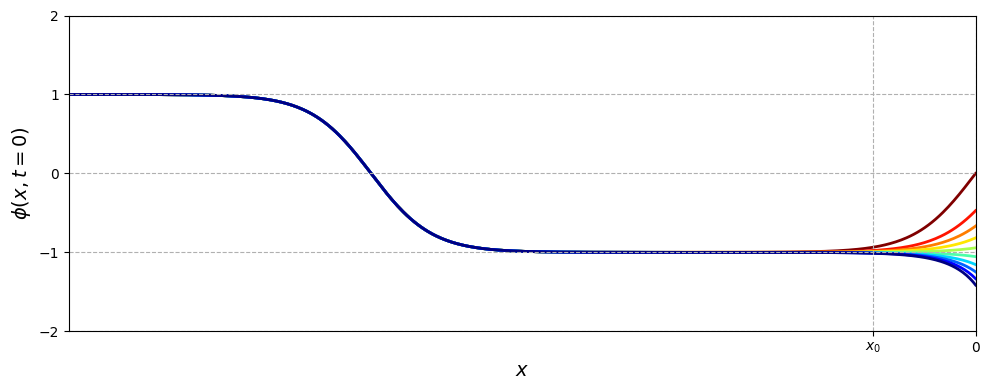

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))

x = np.linspace(-15, 0, 500)
v = 0
values = np.linspace(-1, 1, 10)
cmap = plt.get_cmap('jet', len(values))

for i, H in enumerate(values):
    ax.plot(x, y0(x, v, H)[0], c=cmap(i), lw=2, zorder=-i)

ax.set_ylim(-2, 2)
ax.set_xlim(x.min(), x.max())

ax.set_yticks((-2, -1, 0, 1, 2))
ax.set_xticks([0, x0], [0, r'$x_0$'])

ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$\phi(x, t=0)$', fontsize=14)
ax.grid(ls='--')

fig.tight_layout()
plt.show()

In [5]:
neumann = Neumann(order=4)

collider = Wave(
    x_grid= (-L, 0, N), 
    dt= DT, 
    order= 4,
    y0= lambda x, v: y0(x, v, H=-neumann.param/DX),
    F= Phi4().diff,
    boundaries= (Reflective(order=4), neumann),
    integrator='sy6'
)

def plot_boundary_scatter(v, H, T=100):
    neumann.param = -DX*H
    lat, Y = collider.run(T, v=v)
    y, dydt = Y[:, 0], Y[:, 1]
    plt.imshow(y.T, cmap='seismic', vmin=-1.25, vmax=1.25, extent=lat.extent('t', 'x'), aspect='auto', origin='lower')
    plt.tight_layout()
    plt.ylim(-20, 0)
    return lat, y, dydt

In [6]:
H = -0.2
v = (1 - 4*( (1 + H)**(3/2) + (1 - H)**(3/2) )**-2)**0.5
v

0.17149583947356087

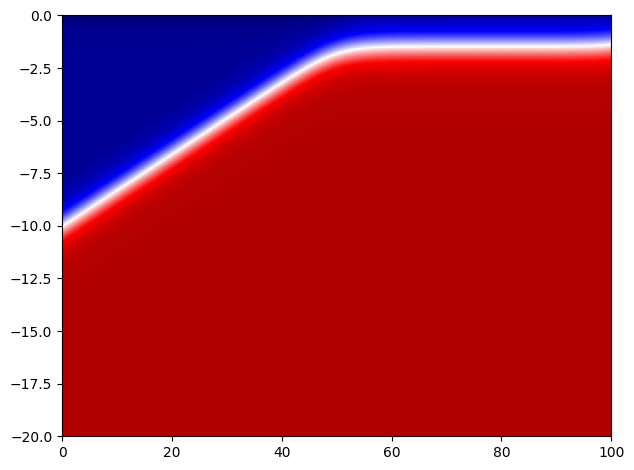

In [7]:
plot_boundary_scatter(v=0.17149329, H=-0.2)
plt.show()

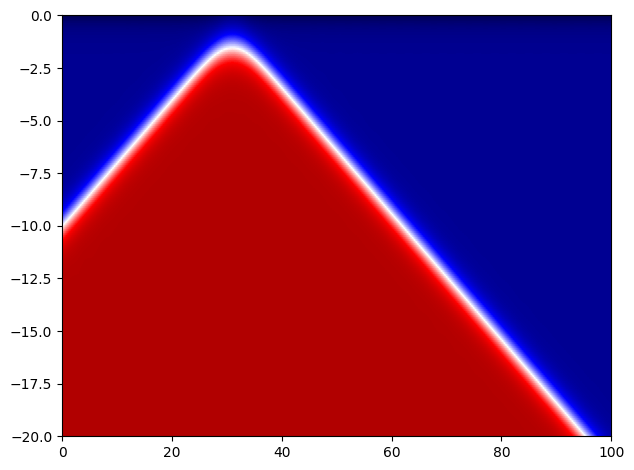

In [8]:
plot_boundary_scatter(v=0.3, H=-0.5)
plt.show()

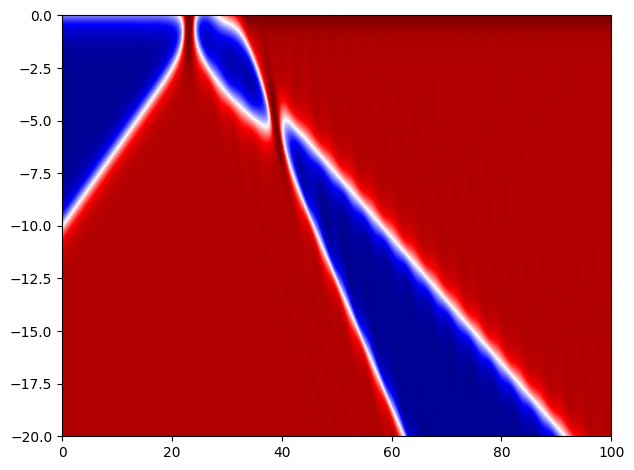

In [11]:
plot_boundary_scatter(v=0.37, H=0.9)
plt.show()

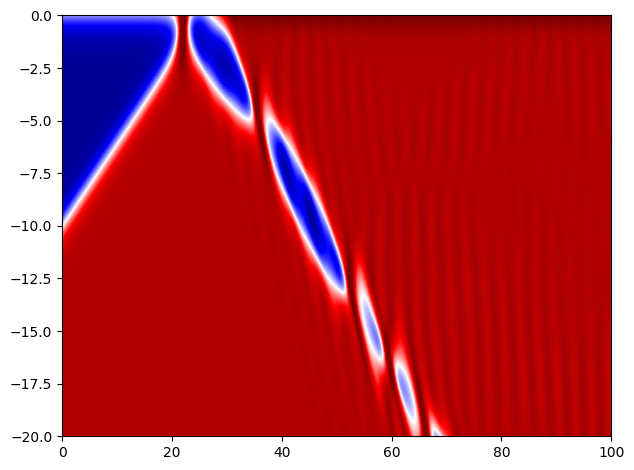

In [8]:
plot_boundary_scatter(v=0.39, H=0.92)
plt.show()

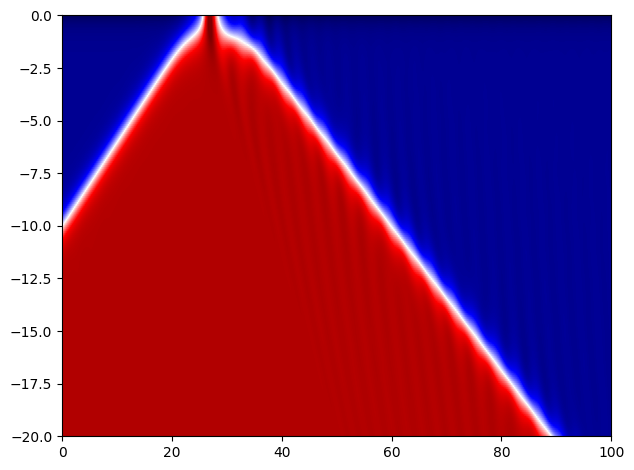

In [15]:
plot_boundary_scatter(v=0.4, H=-0.4)
plt.show()

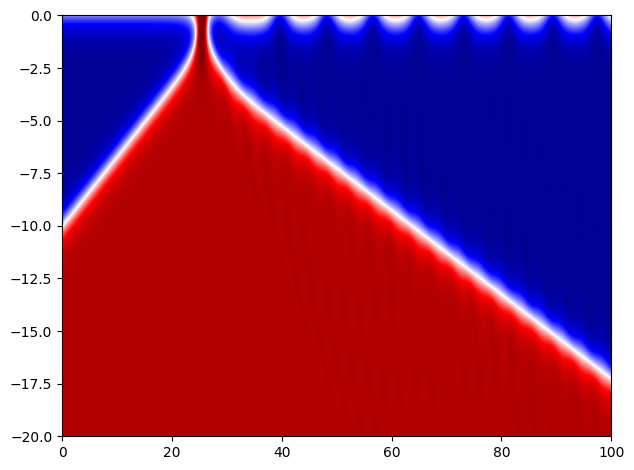

In [19]:
plot_boundary_scatter(v=0.33, H=0.9)
plt.show()